<a href="https://colab.research.google.com/github/Sinjali777/AI/blob/main/Regression_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating dataset with pandas and numpy

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

n_rows = 500

data = {
    "area_sqft": np.random.randint(500, 4000, n_rows),
    "bedrooms": np.random.randint(1, 6, n_rows),
    "bathrooms": np.random.randint(1, 4, n_rows),
    "floors": np.random.randint(1, 4, n_rows),
    "year_built": np.random.randint(1970, 2024, n_rows),
    "distance_city_km": np.round(np.random.uniform(1, 40, n_rows), 2),
    "has_garage": np.random.randint(0, 2, n_rows),
    "has_garden": np.random.randint(0, 2, n_rows),
}

df = pd.DataFrame(data)

# Price formula (realistic relationship + noise)
df["price"] = (
    df["area_sqft"] * 120
    + df["bedrooms"] * 15000
    + df["bathrooms"] * 10000
    + df["floors"] * 8000
    - df["distance_city_km"] * 2500
    + df["has_garage"] * 12000
    + df["has_garden"] * 10000
    + np.random.normal(0, 20000, n_rows)
).astype(int)

df.head()


,area_sqft,bedrooms,bathrooms,floors,year_built,distance_city_km,has_garage,has_garden,price
0,3674,4,3,2,2001,26.81,1,0,506428
1,1360,2,2,1,2020,22.75,1,0,166561
2,1794,3,2,3,2013,29.50,1,0,263078
3,1630,4,3,1,1987,19.14,0,0,232475
4,1595,5,3,3,1975,3.35,1,0,320833


In [2]:
df.isna().sum()

,0
area_sqft,0
bedrooms,0
bathrooms,0
floors,0
year_built,0
distance_city_km,0
has_garage,0
has_garden,0
price,0


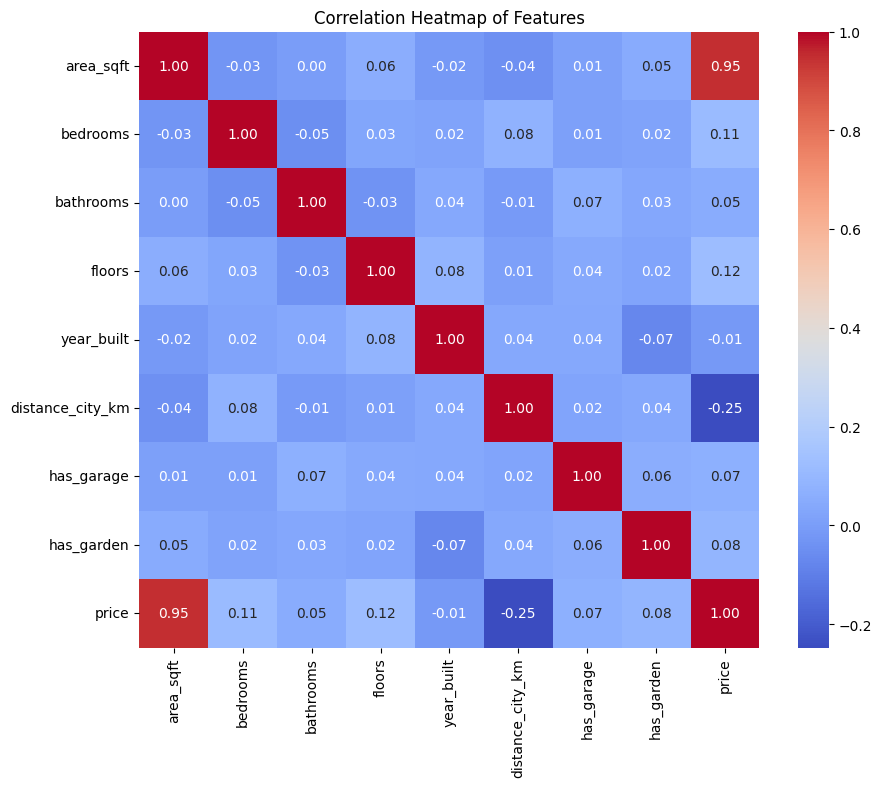

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

**Simple Regression**

In [5]:
X_simple = df[["area_sqft"]]
y = df["price"]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)


In [7]:
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)


LinearRegression()

In [8]:
y_pred_simple = simple_model.predict(X_test)


In [9]:
print("Simple Linear Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_simple))
print("MSE:", mean_squared_error(y_test, y_pred_simple))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_simple)))
print("R² Score:", r2_score(y_test, y_pred_simple))


Simple Linear Regression
MAE: 35366.771007361676
MSE: 1840105093.1558673
RMSE: 42896.44615997772
R² Score: 0.8597069253778217


In [10]:
print(f"Price = {simple_model.coef_[0]:.2f} * area_sqft + {simple_model.intercept_:.2f}")


Price = 122.30 * area_sqft + 32544.54


* 121.53 is the Coefficient (m) → price increases by 121.53 per extra sqft
* area_sqft is the Input variable
* 18432.67 is the Intercept (b) → base price when area = 0

**Multiple Linear Regression**

In [11]:
X_multi = df[
    [
        "area_sqft",
        "bedrooms",
        "bathrooms",
        "floors",
        "distance_city_km",
        "has_garage",
        "has_garden",
    ]
]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_multi, y, test_size=0.2, random_state=42
)


In [13]:
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)


LinearRegression()

In [14]:
y_pred_multi = multi_model.predict(X_test)


In [15]:
print("\nMultiple Linear Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_multi))
print("MSE:", mean_squared_error(y_test, y_pred_multi))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_multi)))
print("R² Score:", r2_score(y_test, y_pred_multi))



Multiple Linear Regression
MAE: 16730.777097492315
MSE: 406233568.8114083
RMSE: 20155.236759001575
R² Score: 0.9690279883495408


In [16]:
coeff_df = pd.DataFrame({
    "Feature": X_multi.columns,
    "Coefficient": multi_model.coef_
})

coeff_df


,Feature,Coefficient
0,area_sqft,120.355584
1,bedrooms,13602.351913
2,bathrooms,8726.493535
3,floors,9324.589054
4,distance_city_km,-2480.029429
5,has_garage,14100.597092
6,has_garden,10123.826856


* Positive coefficient increases price  -> direct relationship
* Negative coefficient decreases price  -> indirect relationship

Multiple regression captures more real-world factors, so it usually gives a much better R² score.